# Dhruv's Section

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install yfinance
import platform
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn

# prints the ticker's close form the most recent, and its change from the day before
def getTickerData(tickerSymbol):
  tickerData = yf.Ticker(tickerSymbol)
  tickerInfo = tickerData.info
  companyName = tickerInfo['shortName']
  print('Company Name: ' + companyName)

  today = datetime.datetime.today().isoformat()
  # tickerOF = tickerData.history(period='1d', start='2020-10-1', end=today[:10])
  # tickerOF = tickerData.history(period='1d', start='2018-5-1', end='2018-6-1')
  tickerOF = tickerData.history(period='1d', start='2020-10-1', end='2020-10-20')
  priceLast = tickerOF['Close'].iloc[-1]
  priceYest = tickerOF['Close'].iloc[-2]
  change = priceLast - priceYest
  print(companyName + ' last price is: ' + str(priceLast))
  print('Price change = ' + str(change))

# Gives a chart of the last 10 days
def getChart(tickerSymbol):
  tickerData = yf.Ticker(tickerSymbol)
  hist = tickerData.history(period="30d", start='2020-9-21', end='2020-10-20')
  # hist = tickerData.history(period='1d', start='2020-10-1', end=today[:10])


  # Plot everything by leveraging the very powerful matplotlib package
  hist['Close'].plot(figsize=(16, 9))


# Calling the functions
getTickerData('MSFT')
getChart('MSFT')



# Andres's Section

In [ ]:
pip install quandl

In [ ]:
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [ ]:
# Get stock data
df = quandl.get("WIKI/FB")
# Print Data
print(df.tail())

In [ ]:
# Get Close Price
df = df[['Adj. Close']]
# Print it
print(df.head())

In [ ]:
# Var for predicting 'n' days out into the future
forecast_out = 30 
# Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-2)
# Print new dataset
print(df.tail())

In [ ]:
# Create independent Data set (X)
# Convert dataframe to numpy array
X = np.array(df.drop(['Prediction'], 1))
# Remove the last 'n' rows
X = X[:-2]
print(X)

In [ ]:
# Create dependent data set (y)
# Convert the dataframe to numpy array (All of the values including NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last n rows
y = y[:-2]
print(y)

In [ ]:
# Split the data into 80% training and 20& testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel="rbf", C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

In [ ]:
# Test Model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

In [ ]:
# Create and train the Linear Regression Model
lr = LinearRegression()
# Train the Model
lr.fit(x_train, y_train)

In [ ]:
# Test Model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

In [ ]:
# Set x_forecast equal to the last 2 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-2:]
print(x_forecast)

In [ ]:
# Print linear regression model predictions for the next n days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print SVR model predictions
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

Backtesting with Zipline

In [ ]:
!pip install backtrader

In [ ]:
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

# Abhinay's Section

In [ ]:
!pip install stocknews

In [ ]:
from stocknews import StockNews

In [ ]:
scraper.find('div', {'class', 'My(6px) Pos(r) smartphone_Mt(6px)'}).find('span').text

# John and Dhruv's Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os
# plt.style.use('fivethirtyeight')


In [ ]:
# df = pd.read_csv('/content/drive/My Drive/AI Stock Predictor Project Group/data/aapl.csv', sep = ',', header = 0)
df = pd.read_csv('aapl.csv',sep = ',', header = 0)
#print(df.tail())

In [ ]:
df.shape
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
print(df.tail())

In [ ]:
# Create independent Data set (X)
# Convert dataframe to numpy array
# X = np.array(df)

# X = df['Close']
# converting list to array
X = np.array(df['Close'])
X = np.reshape(X, (-1, 1))
# print(Temp)
# Remove the last 'n' rows
# X = X[:-forecast_out]
print(X)

In [ ]:
# Create dependent data set (y)
# Convert the dataframe to numpy array (All of the values including NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last n rows
# y = y[:-forecast_out]
print(y)

In [ ]:
# Split the data into 80% training and 20& testing
# x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

# x_train1 = np.array(x_train.drop(['Sentiment','Date', 'Prediction'], axis=1))
# x_test1 = np.array(x_test.drop(['Sentiment','Date', 'Prediction'], axis=1))
x_train1 = np.array(df.drop(['Date', 'Prediction'],1))[:-40]
x_test1 = np.array(df.drop(['Date', 'Prediction'],1))[-40:]


# Split the data into training/testing sets
x_train = X[:-40]
x_test = X[-40:]

# Split the targets into training/testing sets
y_train = y[:-40]
y_test = y[-40:]
print(x_train)
print(x_test)

print(y_train)
print(y_test)



In [ ]:
# # Create and train the Support Vector Machine (Regressor)
# svr_rbf = SVR(kernel="rbf", C=1e3, gamma=0.1)
# svr_rbf.fit(x_train, y_train)

In [ ]:
# # Test Model: Score returns the coefficient of determination R^2 of the prediction
# # # The best possible score is 1.0
# svm_confidence = svr_rbf.score(x_test, y_test)
# print("svm confidence: ", svm_confidence)

In [ ]:
# Create and train the Linear Regression Model
lr = LinearRegression()
# Train the Model
lr.fit(x_train1, y_train)

In [ ]:
# Test Model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
lr_confidence = lr.score(x_test1, y_test)
print("lr confidence: ", lr_confidence)

In [ ]:
# # Print linear regression model predictions for the next n days
# lr_prediction = lr.predict(x_test)
# print(lr_prediction)

# CODE #####################################################################################
# Make predictions using the testing set
# x_forecast is the last row of the data, which we ant to predict
x_forecast = np.array(df.drop(['Date', 'Prediction'],1))[-1:]
print(x_forecast)
lr_prediction = lr.predict(x_forecast)
print('Prediction for the 1 day out:', lr_prediction)

# Print SVR model predictions
# svm_prediction = svr_rbf.predict(x_forecast)
# print(svm_prediction)

In [ ]:
lr_prediction = lr.predict(x_test1)
print(lr_prediction)
# lr_prediction = scalar.inverse_transform(lr_prediction)
# train = df[:x_train1]
# valid = df[x_train1:]
train = x_train1
valid = df.drop(['Date', 'Prediction'],1)[-40:]

valid['Predictions'] = lr_prediction

# Visulaize the date
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [ ]:
lr_prediction = lr.predict(x_test1)
print(lr_prediction)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lr_prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lr_prediction))

# Prediction is black line, actual is blue dot
plt.plot(x_test['Date'], lr_prediction,  color='black')
plt.plot_date(x_test['Date'], x_test['Close'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [ ]:
# Set x_forecast equal to the last n row of the original data set from Close column
x_forecast = np.array(df.drop(['Sentiment', 'Date', 'Prediction'],1))[-1:]
print(x_forecast)

# John's Section

In [ ]:
import urllib.request, json
with urllib.request.urlopen('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMZN&apikey=RKHOCKAPF9H87FQQ') as response:
   data = json.loads(response.read())

meta=data["Meta Data"]
data=data["Time Series (Daily)"]
print(meta)
print(data)

# Dhruv's Section

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
n = 60
df = web.DataReader('V', data_source = 'yahoo', start = '2015-01-01', end = '2020-10-01')
data = df[['Close']]

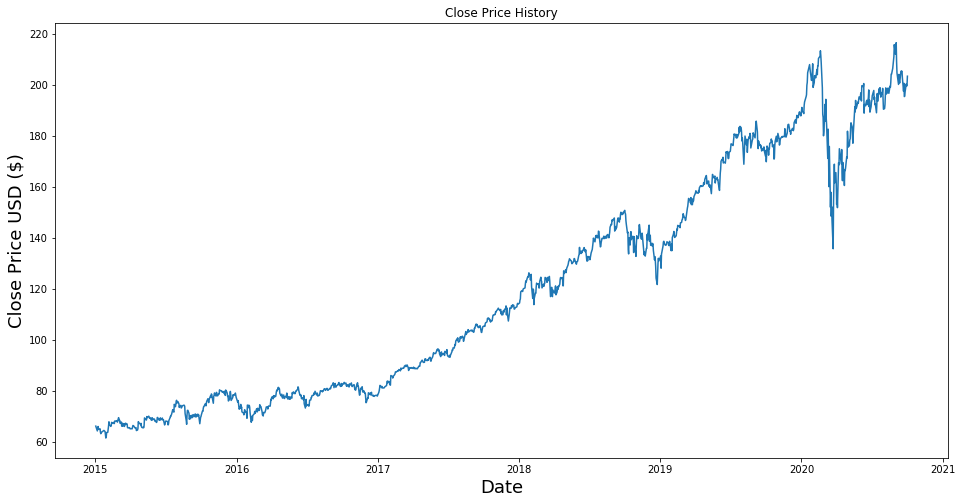

In [3]:
# Visualize the data
# df.shape
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
#Create a new Dataframe
print(data.values)
#print(data.values)
#print(len(data))
# print(type(data))
#Convert to numpy array
dataset = np.array(data.values)
dataset = np.reshape(dataset, (-1, 1))
#print(dataset)
#print(dataset)
#Get the number of rows to train the model
training_data_len = math.ceil(len(data) * .8)

[[ 66.25499725]
 [ 64.79250336]
 [ 64.375     ]
 ...
 [199.44000244]
 [199.97000122]
 [203.3500061 ]]


In [5]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, 0:4]
#Split the data into x_train and y_train
x_train = []
y_train = []
for i in range(n, len(train_data)):
  x_train.append(train_data[i-n:i, 0:4])
  y_train.append(train_data[i, :])

In [7]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data
# (#samples, timesteps, and features)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape

In [ ]:
#Build the LSTM model
model = Sequential()
# 50 neurons, (timesteps, features)
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 5)

In [8]:
#Create the testing dataset
#Create a new array containing scaled values from index size-n to size
# [last n values, all the columns]
test_data = scaled_data[training_data_len - n:, :]
#Create the datasets x_test, y_test
x_test = []
# 61st values
y_test = dataset[training_data_len:, :]
for i in range(n, len(test_data)):
  # Past n values
  x_test.append(test_data[i-n:i, 0])

In [9]:
#convert to numpy array
x_test = np.array(x_test)
print(x_test.shape)

(289, 60)


In [10]:
#Reshape the data for the LSTM model to 3-D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
#Get the models predicted price and values
#print(x_test[0])
model = load_model('lstm_models/v.h5')
predictions = model.predict(x_test)
#print(predictions)
# We want predictions to contain the same values as y_test dataset
predictions = scaler.inverse_transform(predictions)
#print(predictions)
# print(type(predictions))


In [12]:
#Get the root mean squred error (RMSE) - lower the better
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

3.922785036291631


C:\Users\abhin\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


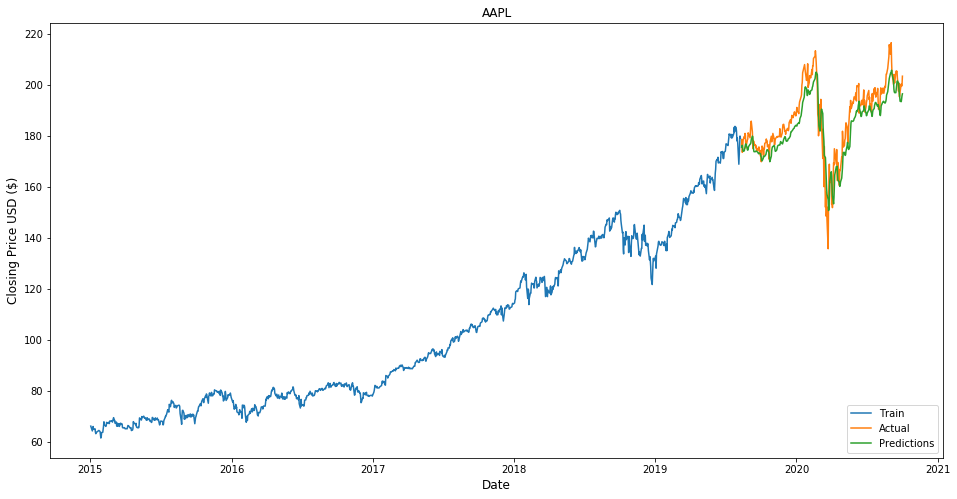

In [13]:
#Plot the data
#print(data[:56])
train = data[:training_data_len]
valid = data[training_data_len:]
#train = data.loc[:'2020-09-01']
#valid = data.loc['2020-09-01':]
#print(data.loc[:'2020-09-01'])
valid['Predictions'] = predictions
#print(type(train))
#print(type(valid))
#predictions_series = []
#indices = list(range(162, 202))
#for prediction in predictions:
#    predictions_series.append(prediction)
#predictions = pd.Series(predictions_series, index = indices)


# Visulaize the date
plt.figure(figsize=(16,8))
plt.title('AAPL')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
print(valid[[180]], predictions[[180]])

In [ ]:
#Get the quote
# apple_quote = web.DataReader('AAPL', data_source="yahoo", start)
from keras.models import save_model
model.save('v.h5')
'''stock_quote = pd.read_csv('/content/aapl.csv',sep = ',', header = 0)
new_df = stock_quote.filter(['Close'])
last_n_days = new_df[-n:].values
last_n_days_scaled = scaler.transform(last_n_days)

X_test = []
X_test.append(last_n_days_scaled)
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)'''